In [1]:
from pycaret.time_series import *


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gc



In [2]:
usecols = ['game_id', 'user_id', 'bet_id', 'game_type', 'odds', 'fiat_bet_amount',
       'fiat_profit_amount','fiat_is_valuable']


In [4]:
bets = pd.read_csv("data/bets.csv", usecols=usecols)


In [5]:
bets.head()


,game_id,user_id,bet_id,game_type,odds,fiat_is_valuable,fiat_bet_amount,fiat_profit_amount
0,2828375,173570,210854317,normal,0.0,t,0.048738,-0.048738
1,2828375,1339924,12148553,yellow,0.0,f,NaN,NaN
2,2828375,1139219,210854260,normal,2.0,t,0.000088,0.000088
3,2828375,1329183,12148544,yellow,0.0,t,0.188109,-0.188109
4,2828375,1378328,210854292,normal,0.0,t,0.000005,-0.000005


In [6]:
usecols = ['game_id', 'max_rate', 'total_bet_amount', 'total_win_amount',
       'total_profit_amount','player_count','bet_count','timestamp']

games = pd.read_csv("data/games.csv", usecols=usecols)
 

In [7]:

games.head()


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,6.43,15.696372,26.377635,10.681263,206,217,1599622213
1,2828376,2.10,69.101741,71.544642,2.442901,294,314,1599622213
2,2828377,3.11,41.762966,32.070902,-9.692064,289,306,1599622213
3,2828378,24.97,73.392453,110.032057,36.639604,281,299,1599622213
4,2828379,1.04,58.377711,71.760673,13.382962,281,297,1599622213


In [8]:
df = pd.merge(bets, games, on='game_id', how='left')


In [9]:
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_is_valuable,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,173570,210854317,normal,0.0,t,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213
1,2828375,1339924,12148553,yellow,0.0,f,NaN,NaN,6.43,15.696372,26.377635,10.681263,206,217,1599622213
2,2828375,1139219,210854260,normal,2.0,t,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213
3,2828375,1329183,12148544,yellow,0.0,t,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213
4,2828375,1378328,210854292,normal,0.0,t,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213


In [10]:
total_profit_amount = games['total_profit_amount'].sum()
total_profit_amount


-168338.77059541445

In [11]:
df['user_id'].nunique()


50039

In [12]:
# df['date'].min(), df['date'].max()


In [13]:
df = df[df['fiat_is_valuable'] == 't']
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_is_valuable,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,173570,210854317,normal,0.0,t,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213
2,2828375,1139219,210854260,normal,2.0,t,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213
3,2828375,1329183,12148544,yellow,0.0,t,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213
4,2828375,1378328,210854292,normal,0.0,t,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213
5,2828375,1420292,210854342,normal,3.0,t,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213


In [14]:
df.columns


Index(['game_id', 'user_id', 'bet_id', 'game_type', 'odds', 'fiat_is_valuable',
       'fiat_bet_amount', 'fiat_profit_amount', 'max_rate', 'total_bet_amount',
       'total_win_amount', 'total_profit_amount', 'player_count', 'bet_count',
       'timestamp'],
      dtype='object')

In [15]:
df = df.drop(columns=['fiat_is_valuable'])


In [16]:
df.columns


Index(['game_id', 'user_id', 'bet_id', 'game_type', 'odds', 'fiat_bet_amount',
       'fiat_profit_amount', 'max_rate', 'total_bet_amount',
       'total_win_amount', 'total_profit_amount', 'player_count', 'bet_count',
       'timestamp'],
      dtype='object')

In [17]:
df.head(20)


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
0,2828375,173570,210854317,normal,0.00,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213
2,2828375,1139219,210854260,normal,2.00,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213
3,2828375,1329183,12148544,yellow,0.00,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213
4,2828375,1378328,210854292,normal,0.00,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213
5,2828375,1420292,210854342,normal,3.00,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213
6,2828375,1205760,12148533,red,0.00,0.000176,-0.000176,6.43,15.696372,26.377635,10.681263,206,217,1599622213
7,2828375,1335815,210854336,normal,2.00,0.000008,0.000008,6.43,15.696372,26.377635,10.681263,206,217,1599622213
8,2828375,1189902,210854446,normal,5.00,0.000283,0.001131,6.43,15.696372,26.377635,10.681263,206,217,1599622213
9,2828375,1378313,210854326,normal,2.00,0.000301,0.000301,6.43,15.696372,26.377635,10.681263,206,217,1599622213
10,2828375,1287181,210854358,normal,2.00,0.000019,0.000019,6.43,15.696372,26.377635,10.681263,206,217,1599622213


In [18]:
df['game_type'].value_counts()


game_type
normal    20495283
red        1285552
green      1273361
yellow      281728
Name: count, dtype: int64

In [19]:
df['saldo'] = df.groupby('user_id')['fiat_profit_amount'].cumsum()
df['n_aposta'] = df.groupby('user_id').cumcount() + 1


In [20]:
# df[df['game_type']=='red'].sort_values('odds')

#green - 2
#yellow - 10


In [21]:
conditions = [
    (df['game_type'] == 'normal') & (df['odds'] == 0),
    (df['game_type'] == 'green'),
    (df['game_type'] == 'red'),
    (df['game_type'] == 'yellow')
]

values = [
    df['max_rate'],
    2,
    1.96,
    10
]

df['odds_adjusted'] = np.select(conditions, values, default=df['odds'])


In [22]:
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted
0,2828375,173570,210854317,normal,0.0,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.048738,1,6.43
2,2828375,1139219,210854260,normal,2.0,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000088,1,2.00
3,2828375,1329183,12148544,yellow,0.0,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.188109,1,10.00
4,2828375,1378328,210854292,normal,0.0,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.000005,1,6.43
5,2828375,1420292,210854342,normal,3.0,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000213,1,3.00


In [23]:

df['bet_mean'] = df.groupby('user_id')['fiat_bet_amount'].transform('mean')



In [24]:
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean
0,2828375,173570,210854317,normal,0.0,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.048738,1,6.43,0.053502
2,2828375,1139219,210854260,normal,2.0,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000088,1,2.00,0.000143
3,2828375,1329183,12148544,yellow,0.0,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.188109,1,10.00,0.467819
4,2828375,1378328,210854292,normal,0.0,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.000005,1,6.43,0.000947
5,2828375,1420292,210854342,normal,3.0,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000213,1,3.00,0.000291


In [25]:
df['bet_proportion'] = df['fiat_bet_amount'] / df['bet_mean']
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion
0,2828375,173570,210854317,normal,0.0,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.048738,1,6.43,0.053502,0.910945
2,2828375,1139219,210854260,normal,2.0,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000088,1,2.00,0.000143,0.611533
3,2828375,1329183,12148544,yellow,0.0,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.188109,1,10.00,0.467819,0.402098
4,2828375,1378328,210854292,normal,0.0,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.000005,1,6.43,0.000947,0.005158
5,2828375,1420292,210854342,normal,3.0,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000213,1,3.00,0.000291,0.366326


In [26]:
df['risk'] = df['odds_adjusted'] * df['bet_proportion']
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk
0,2828375,173570,210854317,normal,0.0,0.048738,-0.048738,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.048738,1,6.43,0.053502,0.910945,5.857378
2,2828375,1139219,210854260,normal,2.0,0.000088,0.000088,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000088,1,2.00,0.000143,0.611533,1.223067
3,2828375,1329183,12148544,yellow,0.0,0.188109,-0.188109,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.188109,1,10.00,0.467819,0.402098,4.020981
4,2828375,1378328,210854292,normal,0.0,0.000005,-0.000005,6.43,15.696372,26.377635,10.681263,206,217,1599622213,-0.000005,1,6.43,0.000947,0.005158,0.033166
5,2828375,1420292,210854342,normal,3.0,0.000107,0.000213,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.000213,1,3.00,0.000291,0.366326,1.098979


In [27]:
df['risk_log'] = np.log1p(df['risk'])
df.head()


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,...,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk,risk_log
0,2828375,173570,210854317,normal,0.0,0.048738,-0.048738,6.43,15.696372,26.377635,...,206,217,1599622213,-0.048738,1,6.43,0.053502,0.910945,5.857378,1.925325
2,2828375,1139219,210854260,normal,2.0,0.000088,0.000088,6.43,15.696372,26.377635,...,206,217,1599622213,0.000088,1,2.00,0.000143,0.611533,1.223067,0.798888
3,2828375,1329183,12148544,yellow,0.0,0.188109,-0.188109,6.43,15.696372,26.377635,...,206,217,1599622213,-0.188109,1,10.00,0.467819,0.402098,4.020981,1.613625
4,2828375,1378328,210854292,normal,0.0,0.000005,-0.000005,6.43,15.696372,26.377635,...,206,217,1599622213,-0.000005,1,6.43,0.000947,0.005158,0.033166,0.032628
5,2828375,1420292,210854342,normal,3.0,0.000107,0.000213,6.43,15.696372,26.377635,...,206,217,1599622213,0.000213,1,3.00,0.000291,0.366326,1.098979,0.741451


In [28]:
df_small = df[['user_id','risk_log','game_id','saldo']].copy()
out = (
    df_small.groupby('user_id', sort=False)
            .agg(avg_risk=('risk_log','mean'),
                 game_count=('game_id','nunique'),
                 saldo=('saldo','sum'))
            .reset_index()
)


In [29]:
out.sort_values('avg_risk')


,user_id,avg_risk,game_count,saldo
496,560965,0.003968,2140,1.876924e+01
16799,1455307,0.009234,743,1.533791e-03
6090,1351871,0.011416,2512,2.929007e+01
1148,146999,0.019031,3933,-5.012718e+03
5568,669105,0.020407,1139,6.870122e+00
...,...,...,...,...
29326,1495213,4.186772,1,-7.383542e-09
9424,1439660,4.399007,1,-3.676389e-02
9382,1439612,4.583640,1,-3.676389e-02
16248,986048,4.615121,1,5.619374e-08


In [30]:
valid_players = out[(out['game_count'] > 4700) & (out['game_count'] < 5300)].sort_values('avg_risk')
valid_players[valid_players['avg_risk']>0.20].sort_values('avg_risk')


,user_id,avg_risk,game_count,saldo
989,153951,0.201720,4787,2.430384e+03
6330,247796,0.247977,5243,8.411311e+01
15820,1001572,0.275263,4756,3.865463e+02
9648,1376170,0.295984,4737,4.618599e+02
25003,234569,0.305685,4961,1.378507e+03
14058,1448214,0.318918,4948,3.539223e+01
3824,1335853,0.334628,5228,1.110677e+03
671,962784,0.346708,5256,-1.996834e+03
2600,1375613,0.370835,4993,-1.932139e+04
1259,1432021,0.373805,5254,-5.205836e+03


In [31]:
players={}


players = {
    0.2:1367256,
    0.3:153951,
    0.4:234569,
    0.5:1334131,
    0.6:770269,
    0.7:415520,
    0.8:1459527,
    0.9:1404797,
    1:776411,
    
}


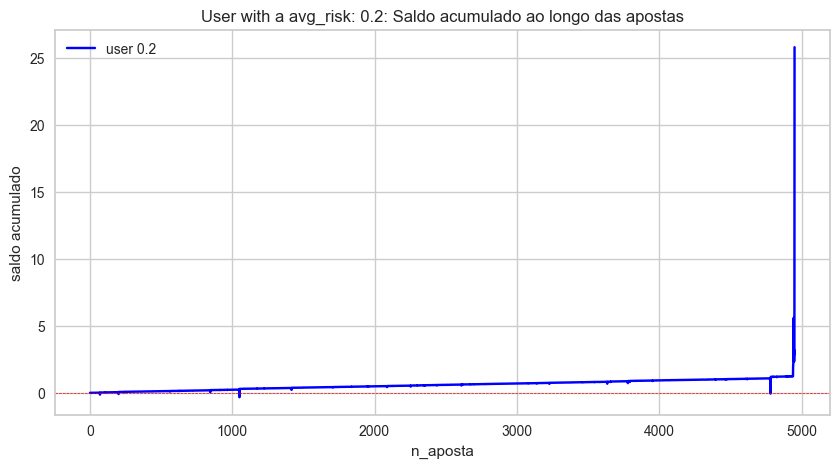

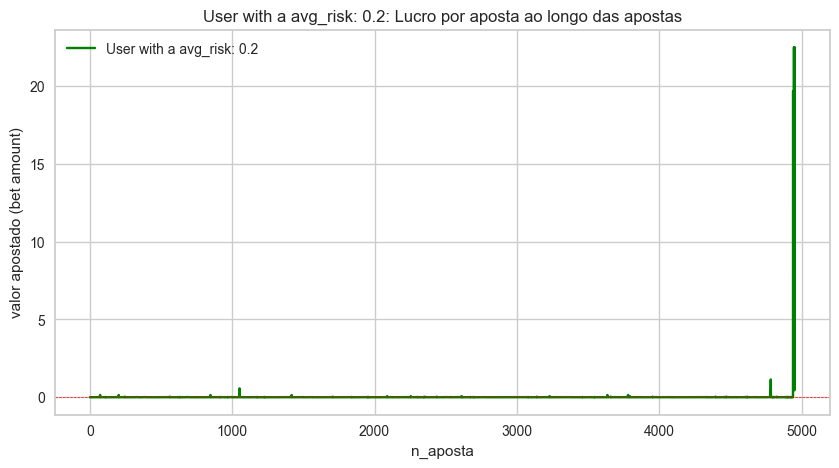

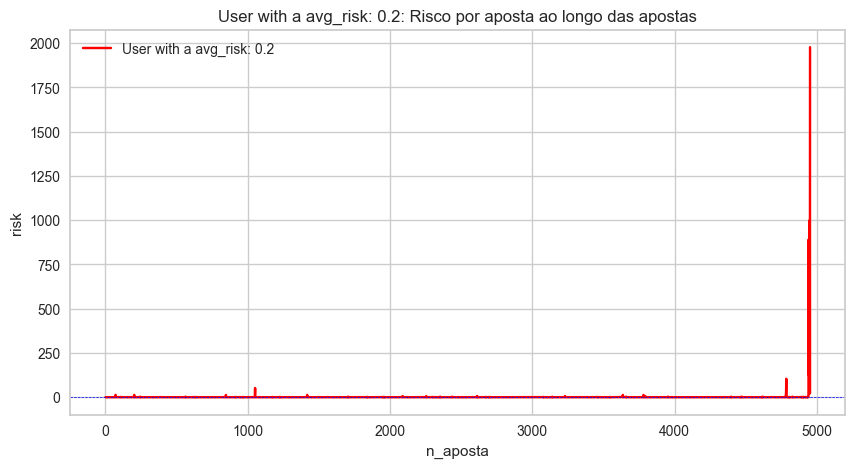

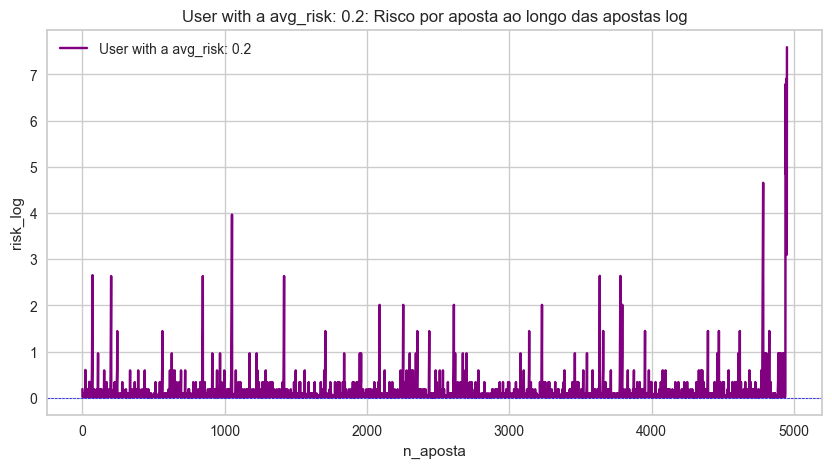

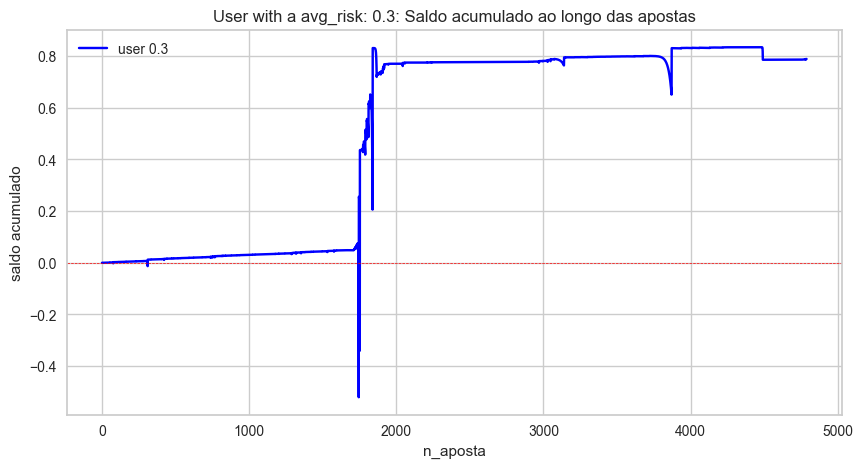

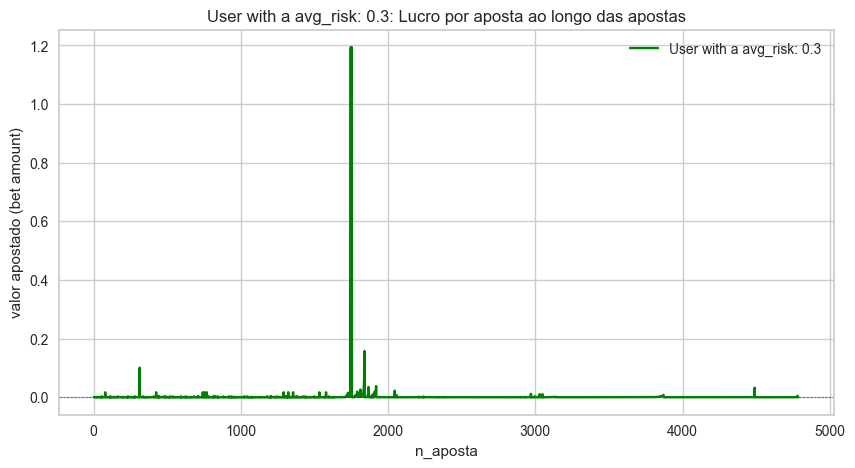

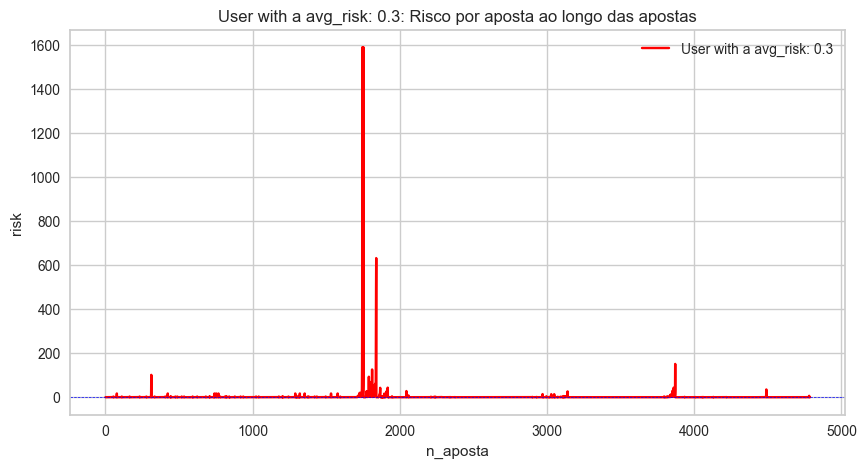

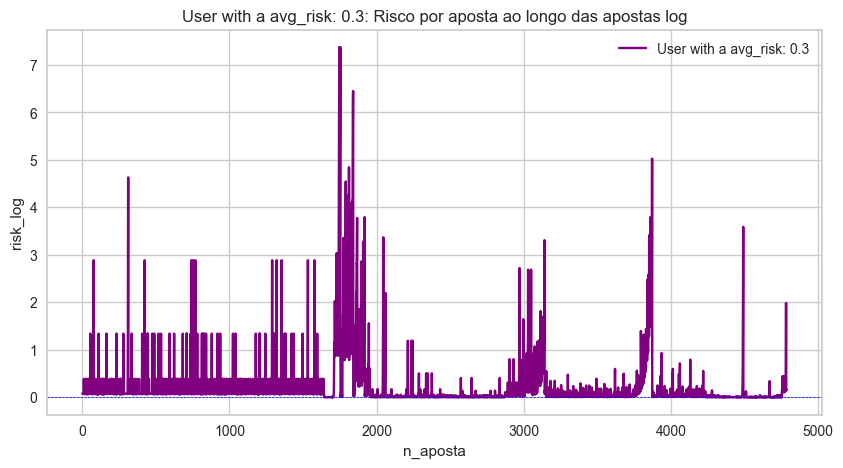

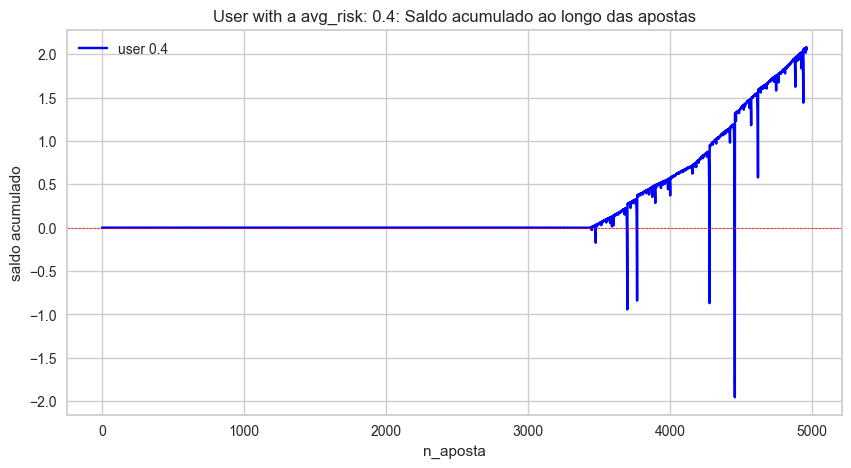

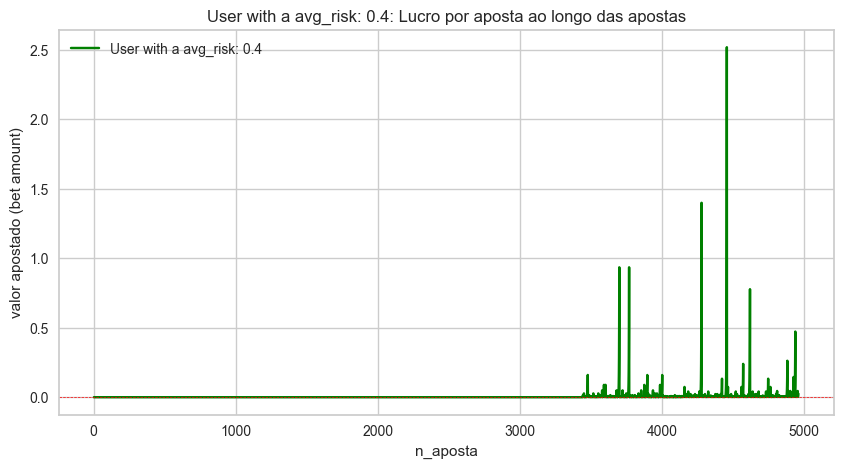

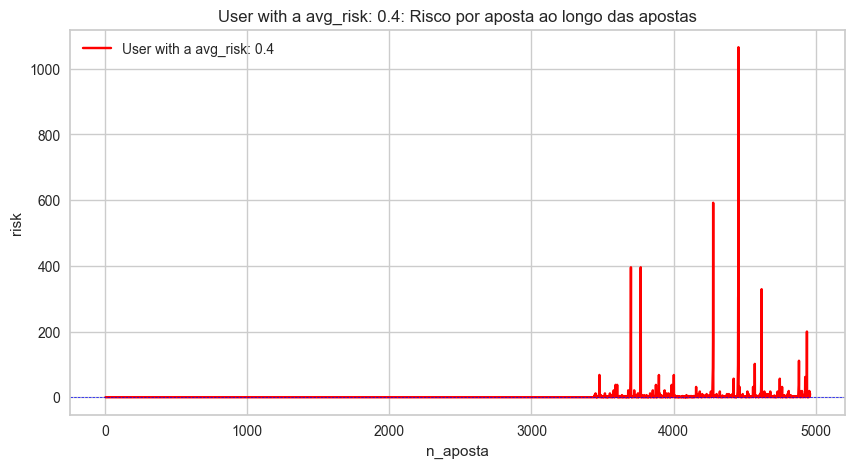

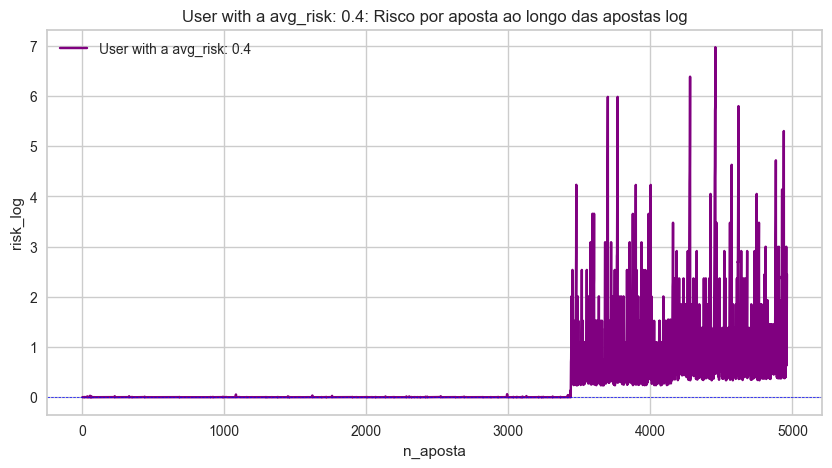

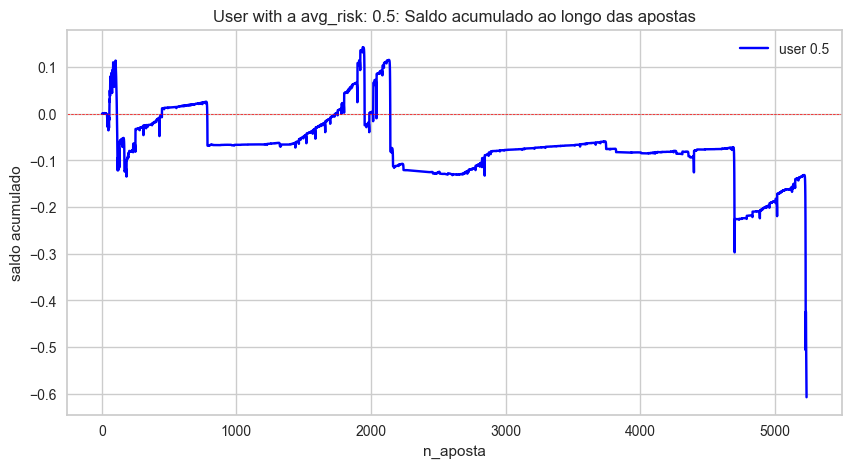

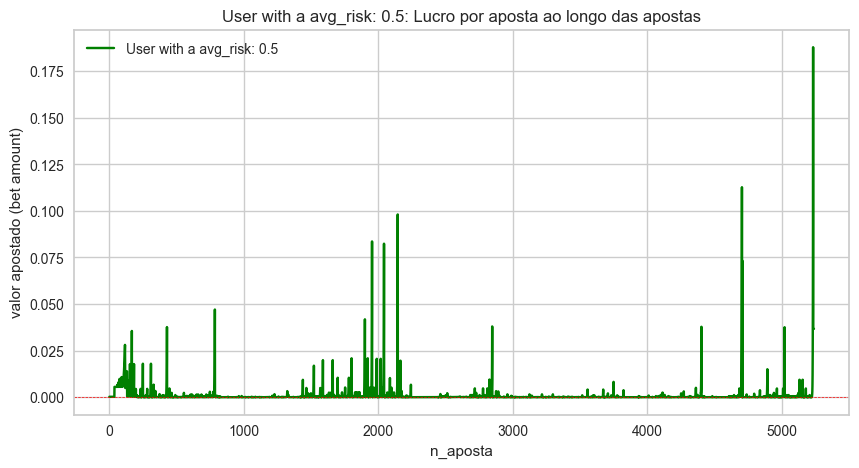

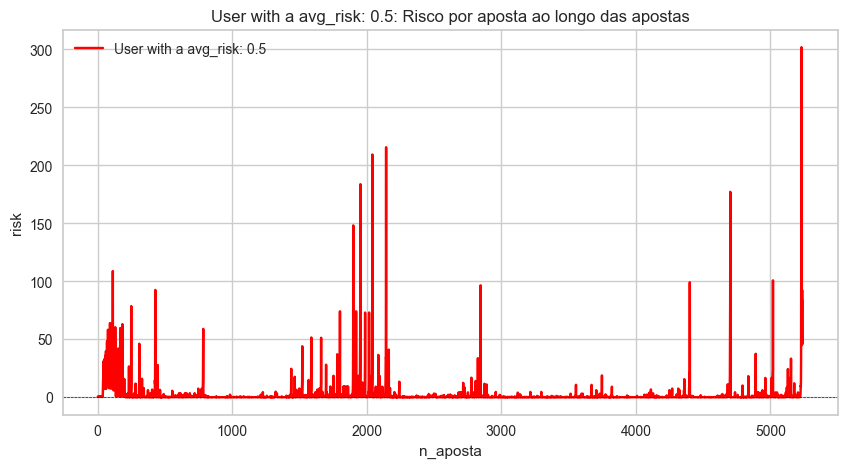

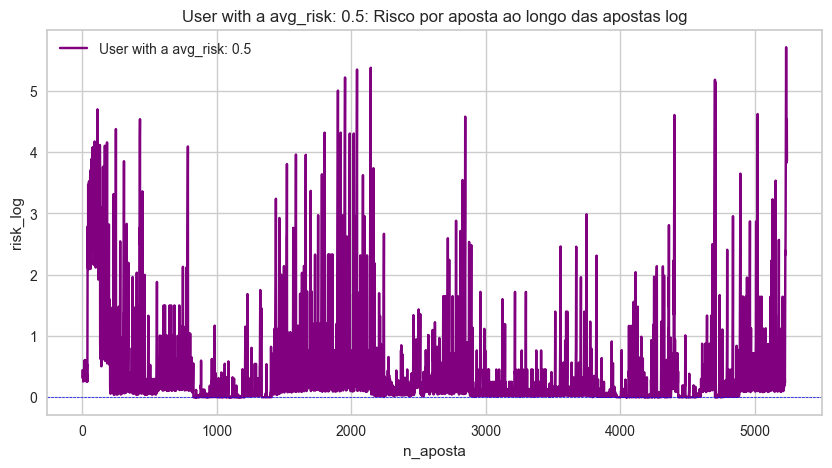

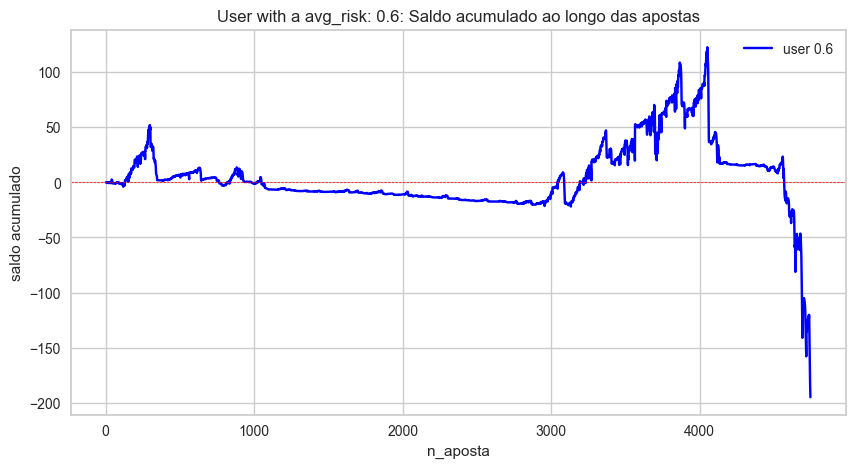

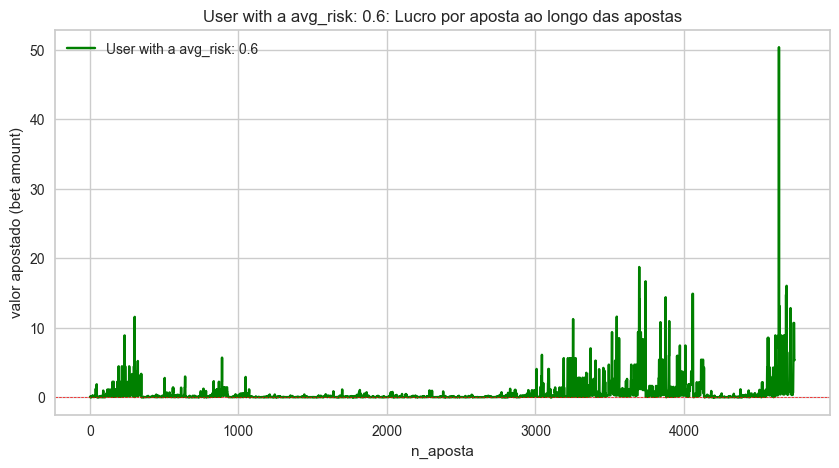

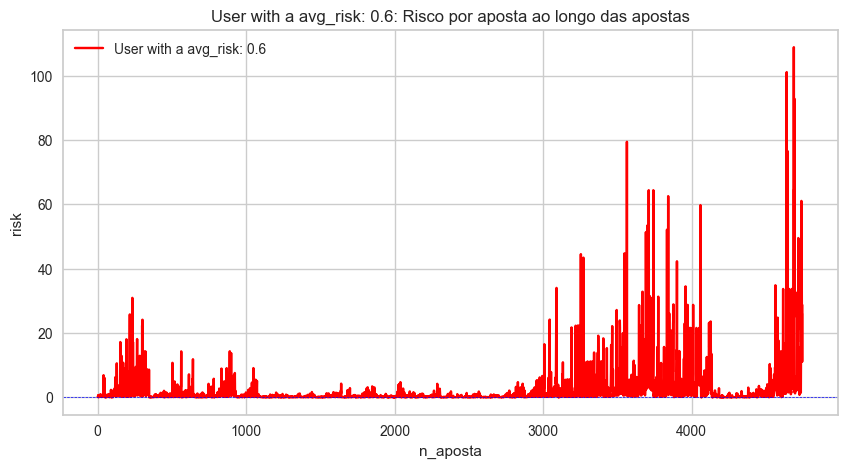

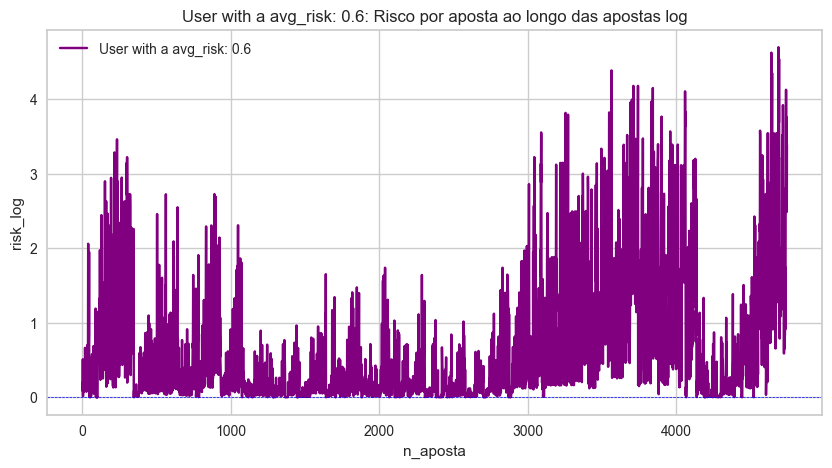

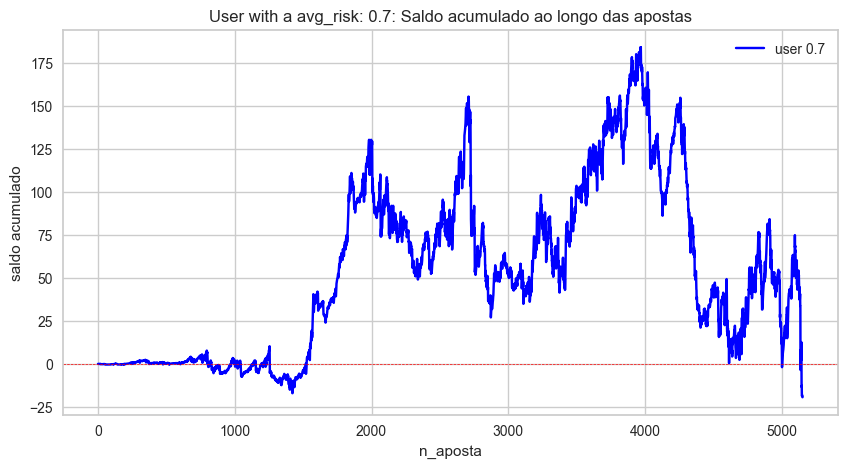

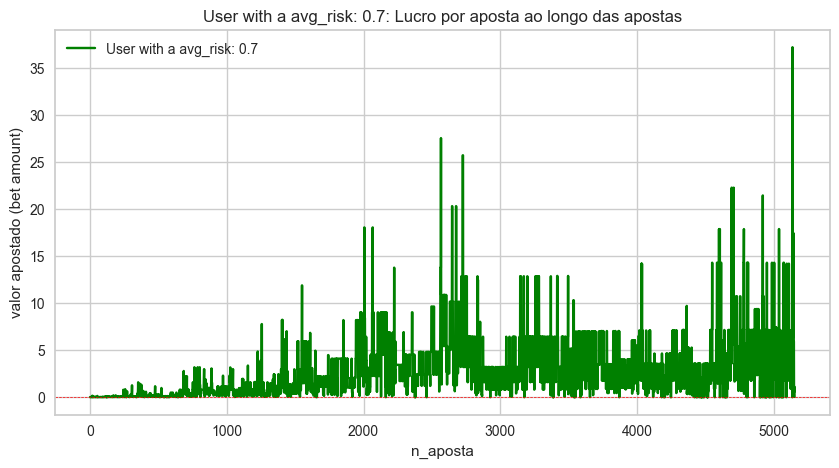

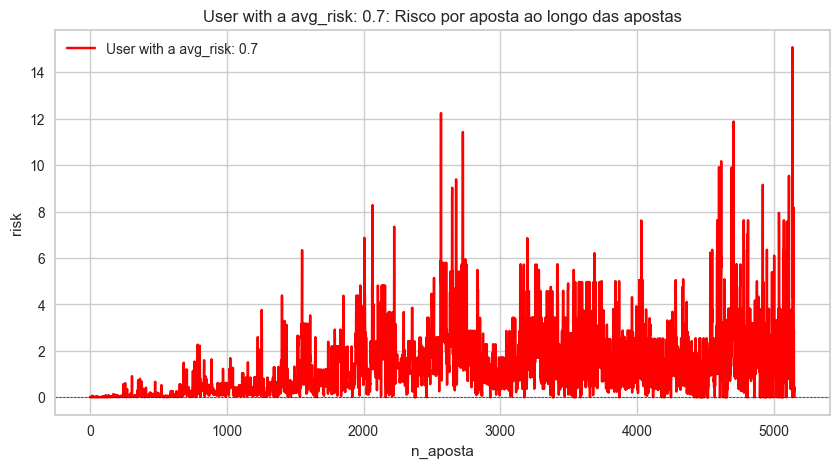

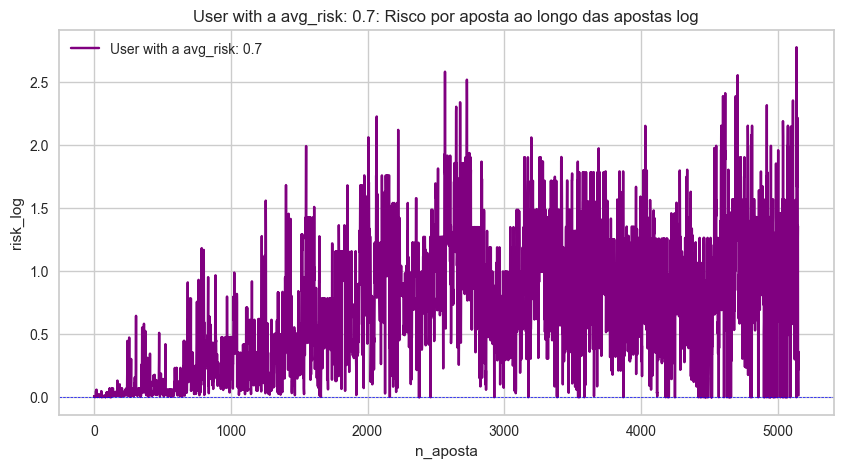

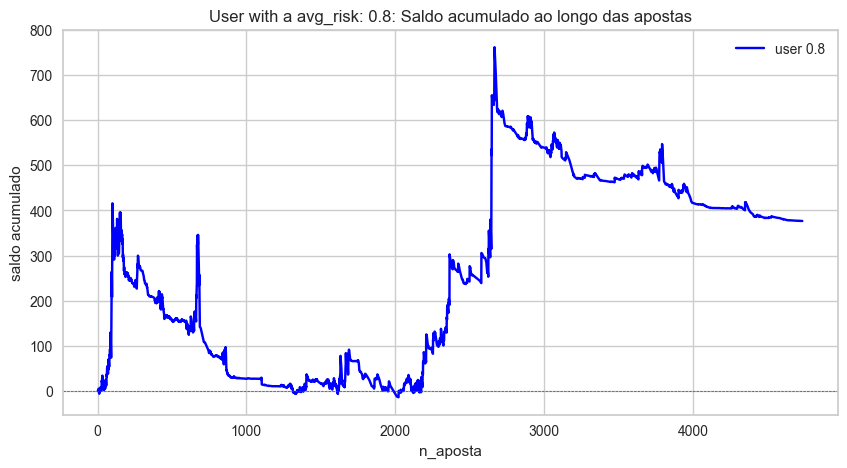

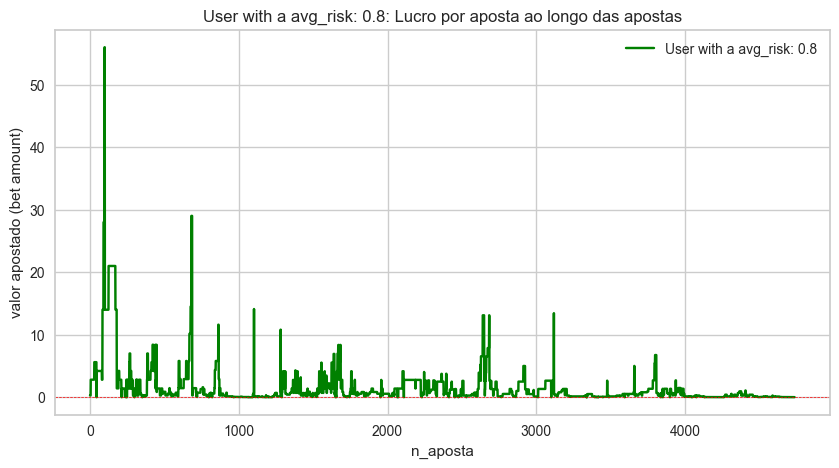

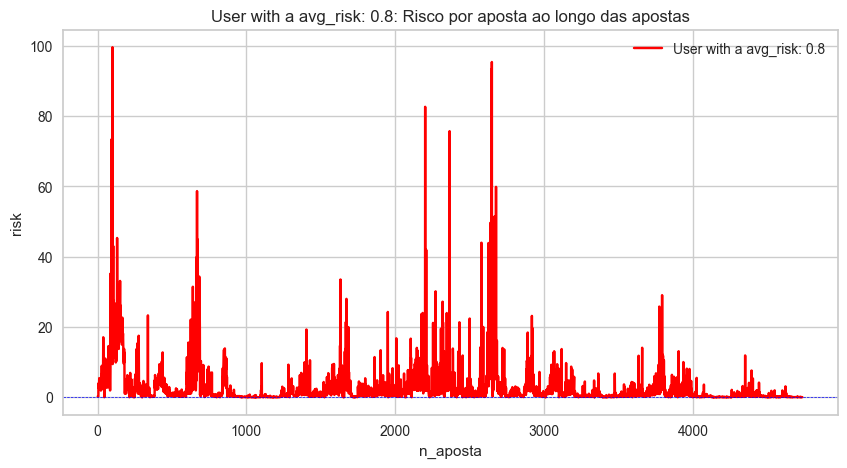

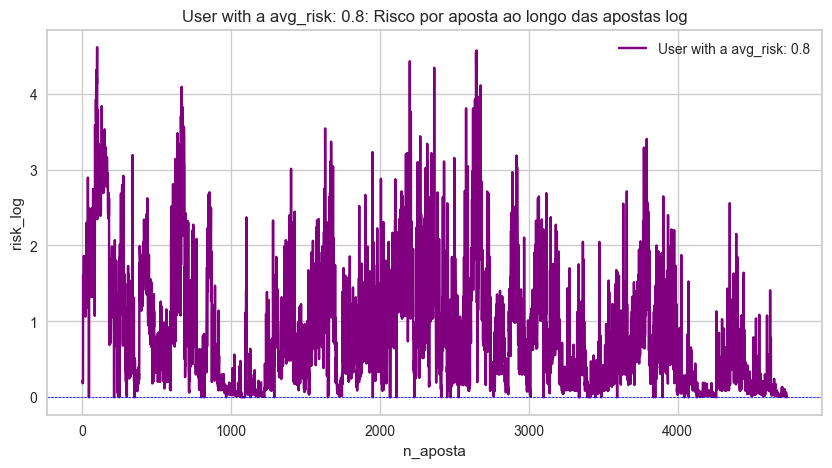

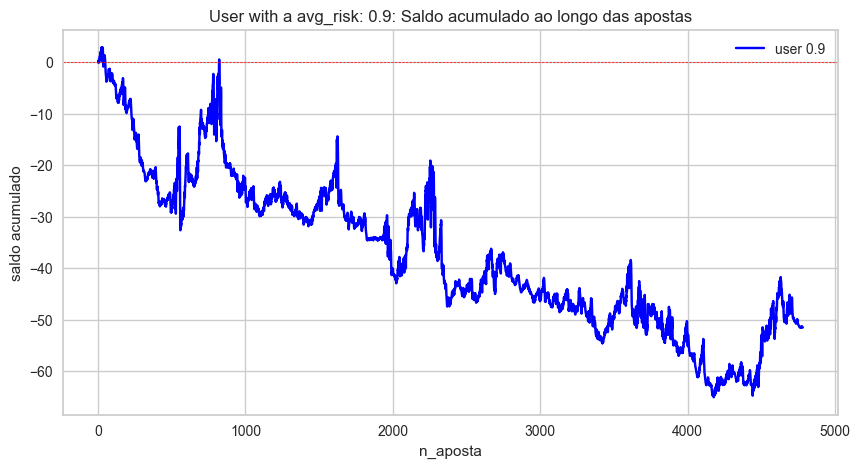

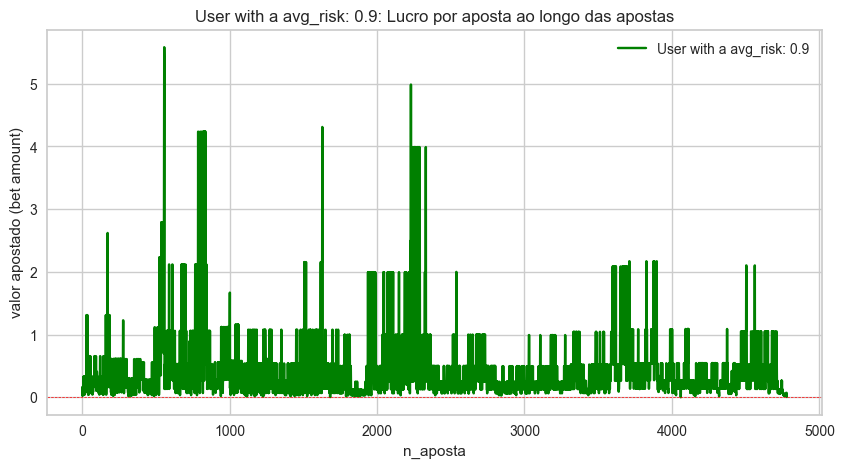

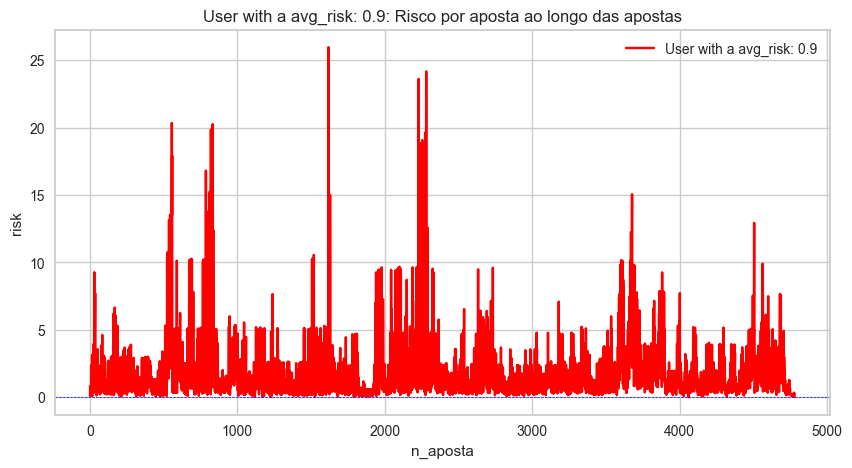

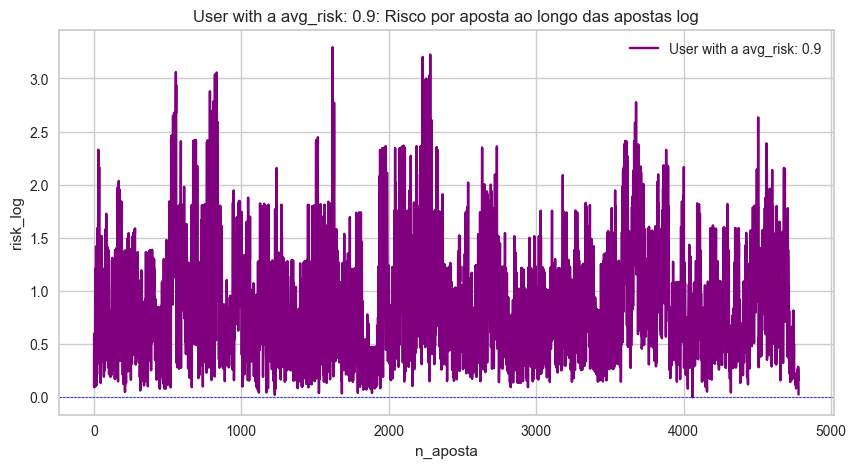

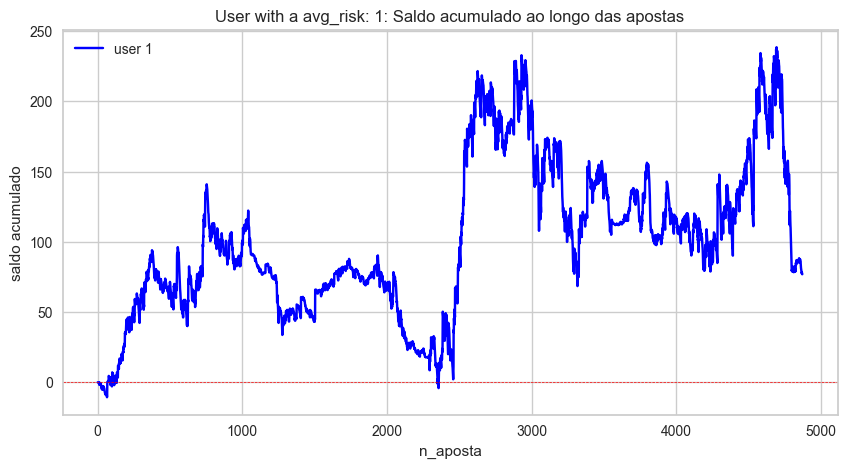

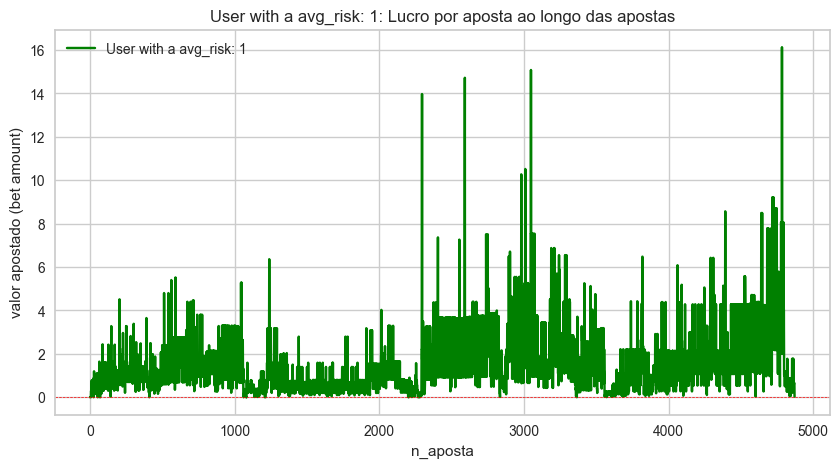

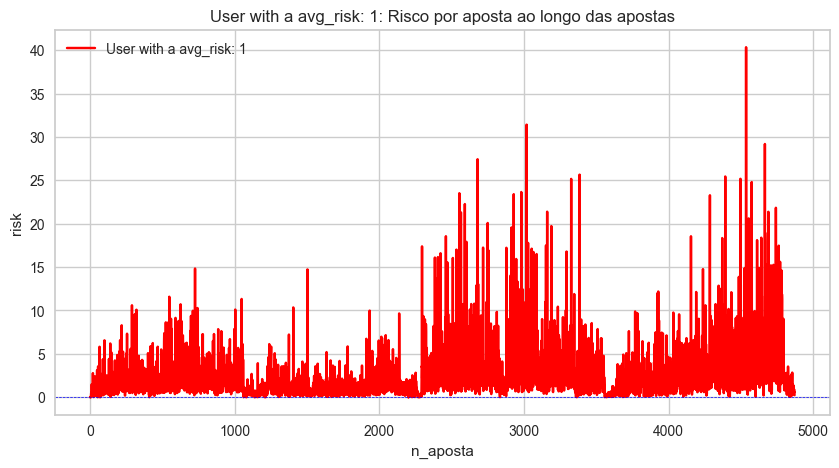

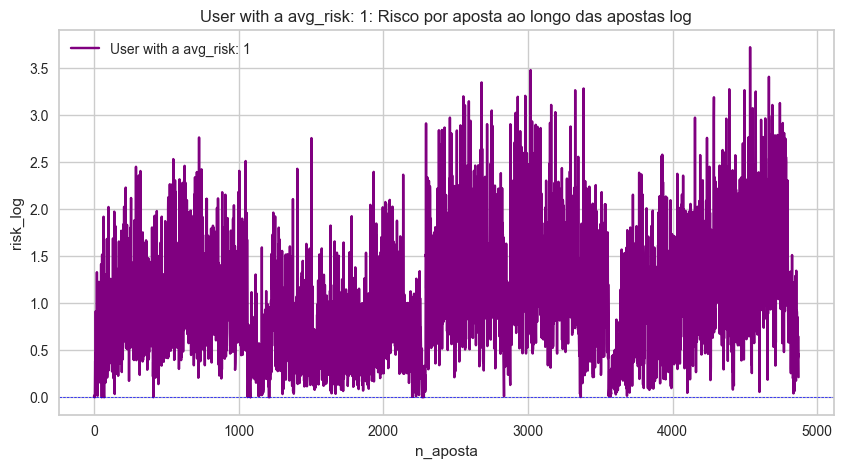

In [32]:


import os

output_dir = "plots_users"
os.makedirs(output_dir, exist_ok=True)

for uid in players:
    u = df[df['user_id'] == players[uid]].sort_values('n_aposta')
    
    # Saldo acumulado
    plt.figure(figsize=(10, 5))
    plt.plot(u['n_aposta'], u['saldo'], label=f'user {uid}', color='blue')
    plt.legend()
    plt.xlabel('n_aposta')
    plt.ylabel('saldo acumulado')
    plt.title(f'User with a avg_risk: {uid}: Saldo acumulado ao longo das apostas')
    plt.axhline(y=0, color='red', linewidth=0.5, linestyle='--')
    plt.grid(True)
    saldo_path = os.path.join(output_dir, f"user_{uid}_saldo_acumulado.png")
    plt.savefig(saldo_path, bbox_inches="tight")
    plt.show()
    plt.close()
    
    # valor apostado
    plt.figure(figsize=(10, 5))
    plt.plot(u['n_aposta'], u['fiat_bet_amount'], label=f'User with a avg_risk: {uid}', color='green')
    plt.legend()
    plt.xlabel('n_aposta')
    plt.ylabel('valor apostado (bet amount)')
    plt.title(f'User with a avg_risk: {uid}: Lucro por aposta ao longo das apostas')
    plt.axhline(y=0, color='red', linewidth=0.5, linestyle='--')
    plt.grid(True)
    lucro_path = os.path.join(output_dir, f"user_{uid}_lucro_por_aposta.png")
    plt.savefig(lucro_path, bbox_inches="tight")
    plt.show()
    plt.close()
    
    # Risco por aposta
    plt.figure(figsize=(10, 5))
    plt.plot(u['n_aposta'], u['risk'], label=f'User with a avg_risk: {uid}', color='red')
    plt.legend()
    plt.xlabel('n_aposta')
    plt.ylabel('risk')
    plt.title(f'User with a avg_risk: {uid}: Risco por aposta ao longo das apostas')
    plt.axhline(y=0, color='blue', linewidth=0.5, linestyle='--')
    plt.grid(True)
    risk_path = os.path.join(output_dir, f"user_{uid}_risco_por_aposta.png")
    plt.savefig(risk_path, bbox_inches="tight")
    plt.show()
    plt.close()
    
    # Risco por aposta
    plt.figure(figsize=(10, 5))
    plt.plot(u['n_aposta'], u['risk_log'], label=f'User with a avg_risk: {uid}', color='purple')
    plt.legend()
    plt.xlabel('n_aposta')
    plt.ylabel('risk_log')
    plt.title(f'User with a avg_risk: {uid}: Risco por aposta ao longo das apostas log')
    plt.axhline(y=0, color='blue', linewidth=0.5, linestyle='--')
    plt.grid(True)
    risk_path = os.path.join(output_dir, f"user_{uid}_risco_por_aposta.png")
    plt.savefig(risk_path, bbox_inches="tight")
    plt.show()
    plt.close()



In [33]:
df[df['user_id'] == 1409606]


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,...,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk,risk_log
13984589,2868758,1409606,225258427,normal,0.0,3.343898e-10,-3.343898e-10,1.53,31.380578,3.642757,...,342,358,1600574407,-3.343898e-10,1,1.53,0.000571,5.860728e-07,8.966914e-07,8.966910e-07
13984944,2868759,1409606,225258758,normal,0.0,6.687797e-10,-6.687797e-10,1.00,103.624682,1.798795,...,337,354,1600574407,-1.003169e-09,2,1.00,0.000571,1.172146e-06,1.172146e-06,1.172145e-06
13985300,2868760,1409606,225259125,normal,0.0,1.337559e-09,-1.337559e-09,1.39,67.683916,13.450565,...,329,348,1600574407,-2.340729e-09,3,1.39,0.000571,2.344291e-06,3.258565e-06,3.258559e-06
13985652,2868761,1409606,225259458,normal,0.0,2.675119e-09,-2.675119e-09,1.58,123.779719,21.998774,...,337,359,1600574407,-5.015847e-09,4,1.58,0.000571,4.688582e-06,7.407960e-06,7.407933e-06
13986006,2868762,1409606,225259932,normal,2.0,5.350237e-09,5.350237e-09,3.86,149.840257,230.298599,...,328,347,1600574407,3.343898e-10,5,2.00,0.000571,9.377165e-06,1.875433e-05,1.875415e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24129132,2895774,1409606,235509981,normal,0.0,2.278421e-04,-2.278421e-04,1.94,44.886768,13.255811,...,394,418,1601352023,-1.220066e-02,1501,1.94,0.000571,3.993306e-01,7.747013e-01,5.736321e-01
24129546,2895775,1409606,235510344,normal,0.0,4.556843e-04,-4.556843e-04,1.60,33.903866,16.089003,...,393,414,1601352023,-1.265635e-02,1502,1.60,0.000571,7.986612e-01,1.277858e+00,8.232355e-01
24129955,2895776,1409606,235510816,normal,2.0,9.113686e-04,9.113686e-04,2.52,51.269818,75.052025,...,386,409,1601352023,-1.174498e-02,1503,2.00,0.000571,1.597322e+00,3.194645e+00,1.433809e+00
24130782,2895778,1409606,235511740,normal,2.0,1.139211e-04,1.139211e-04,5.00,53.122168,101.969314,...,395,419,1601352023,-1.163106e-02,1504,2.00,0.000571,1.996653e-01,3.993306e-01,3.359940e-01


In [34]:
out.sort_values('game_count')


,user_id,avg_risk,game_count,saldo
27682,1490486,1.098612,1,-2.343409e-03
26846,988768,0.746688,1,-1.606678e-02
21023,1467136,0.875469,1,-3.854721e-02
29938,937186,0.867100,1,-2.652593e-06
12087,1242936,1.488400,1,-9.402638e-04
...,...,...,...,...
1781,1262559,0.620254,70821,4.540944e+02
78,1397958,0.454368,71126,8.070242e+06
93,1012475,0.303972,71166,3.030474e+04
125,1192777,0.386967,71245,1.695102e+07


In [35]:
out[out['game_count']>500].iloc[:10]#.sort_values('avg_odds')


,user_id,avg_risk,game_count,saldo
1,1139219,0.284682,19925,-4.710498e+03
2,1329183,0.944406,14977,-6.396536e+06
3,1378328,0.100676,61250,8.415041e+05
4,1420292,0.348702,27449,-1.210737e+04
5,1205760,0.316390,70287,5.526187e+06
7,1189902,0.545568,32619,4.407958e+05
8,1378313,0.376010,19739,7.417770e+03
9,1287181,0.508159,20256,1.344363e+02
10,1240626,0.185890,64037,6.605874e+04
11,1304626,0.461718,69696,3.962178e+06


In [36]:
df[df['user_id'] == 901507]


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,...,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk,risk_log
164,2828375,901507,210854399,normal,5.00,0.050023,0.200092,6.43,15.696372,26.377635,...,206,217,1599622213,0.200092,1,5.00,0.191861,0.260724,1.303622,0.834483
165,2828375,901507,12148560,red,0.00,0.010003,-0.010003,6.43,15.696372,26.377635,...,206,217,1599622213,0.190089,2,1.96,0.191861,0.052135,0.102186,0.097295
449,2828376,901507,210854688,normal,0.00,0.025007,-0.025007,2.10,69.101741,71.544642,...,294,314,1599622213,0.165082,3,2.10,0.191861,0.130339,0.273711,0.241935
450,2828376,901507,12148587,red,0.00,0.020606,-0.020606,2.10,69.101741,71.544642,...,294,314,1599622213,0.144476,4,1.96,0.191861,0.107399,0.210502,0.191035
756,2828377,901507,210855002,normal,0.00,0.031509,-0.031509,3.11,41.762966,32.070902,...,289,306,1599622213,0.112967,5,3.11,0.191861,0.164227,0.510745,0.412603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25699367,2899997,901507,15091814,red,0.00,0.000046,-0.000046,2.51,212.218466,341.837748,...,381,400,1601438402,144.120880,124142,1.96,0.191861,0.000238,0.000466,0.000466
25699751,2899998,901507,237080841,normal,0.00,0.018754,-0.018754,1.07,82.275220,16.021457,...,364,381,1601438402,144.102126,124143,1.07,0.191861,0.097748,0.104591,0.099475
25699752,2899998,901507,15091855,red,1.96,0.000094,0.000090,1.07,82.275220,16.021457,...,364,381,1601438402,144.102216,124144,1.96,0.191861,0.000490,0.000960,0.000960
25700130,2899999,901507,237081127,normal,0.00,0.023630,-0.023630,2.78,202.829346,294.151088,...,367,384,1601438402,144.078586,124145,2.78,0.191861,0.123164,0.342395,0.294455


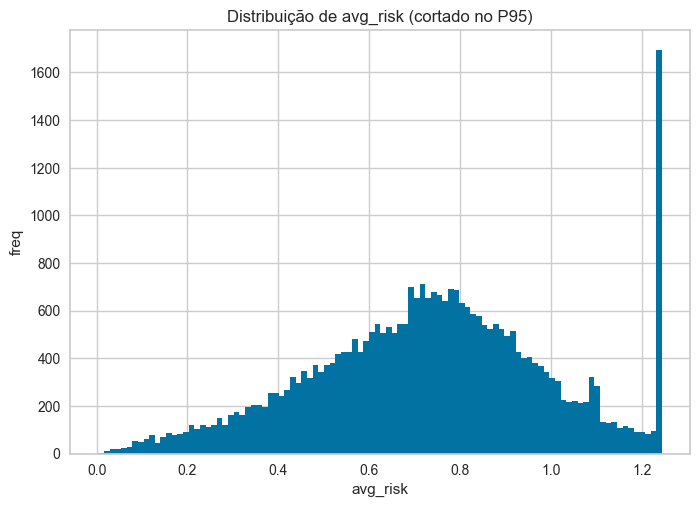

In [37]:
p99 = out['avg_risk'].quantile(0.95)

out['avg_risk'].clip(upper=p99).hist(bins=100)
plt.title('Distribuição de avg_risk (cortado no P95)')
plt.xlabel('avg_risk')
plt.ylabel('freq')
plt.show()


In [38]:
df[df['user_id'] == 1192777].iloc[124465:124510]


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,...,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk,risk_log
22891959,2892572,1192777,14801125,red,0.00,0.005870,-0.005870,3.30,88.046434,159.129896,...,336,353,1601265603,315.028348,124466,1.96,0.052941,0.110883,0.217330,0.196660
22892339,2892573,1192777,234254267,normal,0.00,0.001796,-0.001796,1.19,107.938929,1.547741,...,372,393,1601265603,315.026552,124467,1.19,0.052941,0.033932,0.040379,0.039585
22892340,2892573,1192777,14801159,red,1.96,0.011741,0.011271,1.19,107.938929,1.547741,...,372,393,1601265603,315.037823,124468,1.96,0.052941,0.221766,0.434660,0.360928
22892734,2892574,1192777,234254564,normal,1.38,0.004761,0.001809,2.28,108.528022,168.523622,...,374,394,1601265603,315.039632,124469,1.38,0.052941,0.089921,0.124092,0.116975
22892735,2892574,1192777,14801196,red,0.00,0.005870,-0.005870,2.28,108.528022,168.523622,...,374,394,1601265603,315.033761,124470,1.96,0.052941,0.110883,0.217330,0.196660
22893123,2892575,1192777,234255149,normal,0.00,0.001796,-0.001796,1.47,76.302836,20.469621,...,369,387,1601265603,315.031965,124471,1.47,0.052941,0.033932,0.049881,0.048676
22893124,2892575,1192777,14801238,red,1.96,0.011741,0.011271,1.47,76.302836,20.469621,...,369,387,1601265603,315.043236,124472,1.96,0.052941,0.221766,0.434660,0.360928
22893515,2892576,1192777,234255389,normal,1.38,0.004761,0.001809,4.32,162.168325,307.953632,...,380,401,1601265603,315.045045,124473,1.38,0.052941,0.089922,0.124092,0.116976
22893516,2892576,1192777,14801279,red,0.00,0.005870,-0.005870,4.32,162.168325,307.953632,...,380,401,1601265603,315.039175,124474,1.96,0.052941,0.110883,0.217330,0.196660
22893908,2892577,1192777,234255871,normal,2.00,0.001796,0.001796,2.63,73.600531,113.000254,...,367,384,1601265603,315.040971,124475,2.00,0.052941,0.033933,0.067865,0.065662


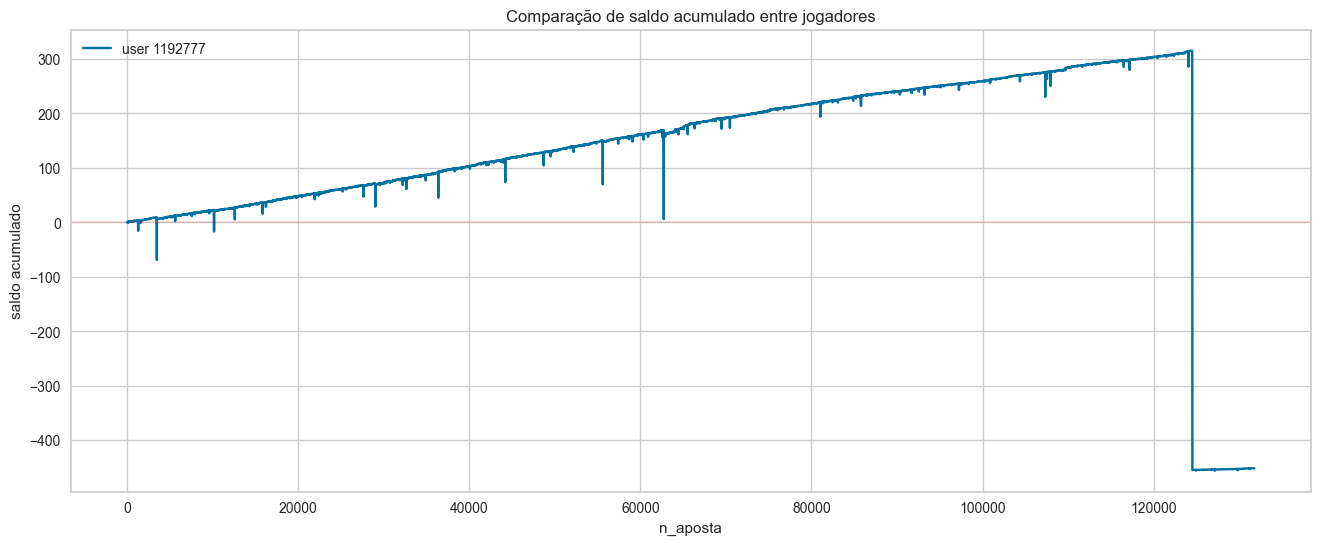

In [39]:
fig = plt.figure(figsize=(16, 6))

top_users = [1192777]  # 942021 substitui pelos que quer comparar
for uid in top_users:
    u = df[df['user_id'] == uid]#.iloc[124495:124508]
    plt.plot(u['n_aposta'], u['saldo'], label=f'user {uid}')

plt.legend()
plt.xlabel('n_aposta')
plt.ylabel('saldo acumulado')
plt.title('Comparação de saldo acumulado entre jogadores')
plt.axhline(y=0, color='red', linewidth=0.2,linestyle='--')
plt.grid(True)
plt.show()


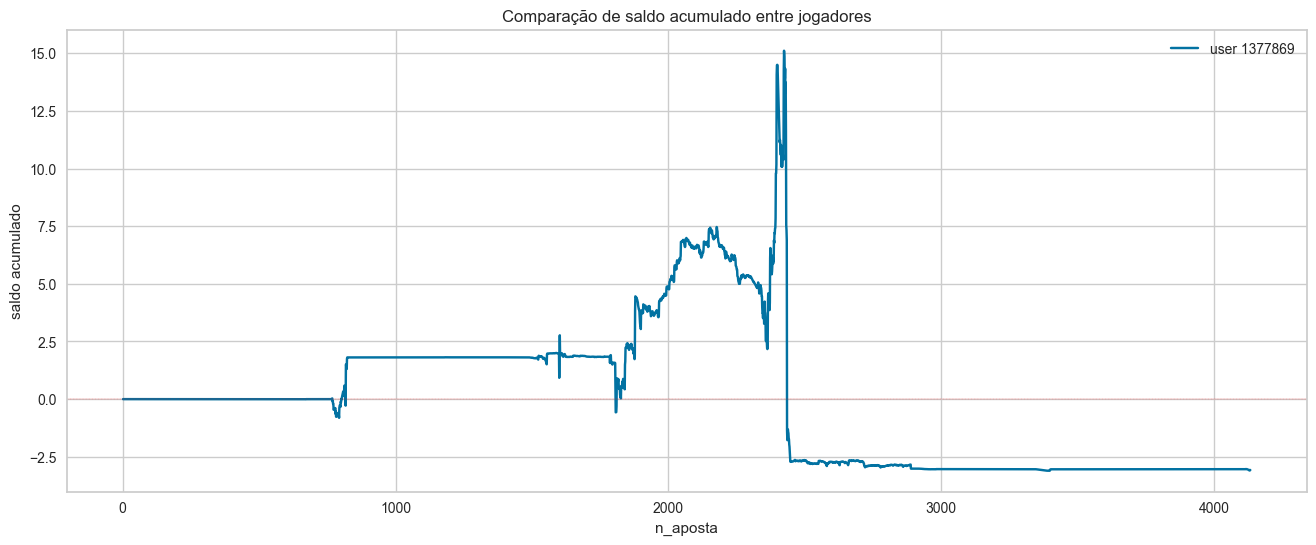

In [40]:
fig = plt.figure(figsize=(16, 6))

top_users = [1377869]  # 942021 substitui pelos que quer comparar
for uid in top_users:
    u = df[df['user_id'] == uid]#.iloc[124495:124508]
    plt.plot(u['n_aposta'], u['saldo'], label=f'user {uid}')

plt.legend()
plt.xlabel('n_aposta')
plt.ylabel('saldo acumulado')
plt.title('Comparação de saldo acumulado entre jogadores')
plt.axhline(y=0, color='red', linewidth=0.2,linestyle='--')
plt.grid(True)
plt.show()


In [41]:
df[df['user_id'] == 1294206].iloc[730:760]


,game_id,user_id,bet_id,game_type,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,...,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk,risk_log
6586123,2847363,1294206,217616314,normal,2.0,0.000731,0.000731,6.49,1057.210543,2569.098460,...,368,393,1600056006,0.069500,731,2.00,0.000831,0.879768,1.759536,1.015063
6586504,2847364,1294206,217616698,normal,0.0,0.000366,-0.000366,1.12,887.963550,0.641619,...,353,378,1600056006,0.069135,732,1.12,0.000831,0.439884,0.492670,0.400567
6586893,2847365,1294206,217617009,normal,2.0,0.000731,0.000731,3.04,1068.019687,2442.858150,...,371,398,1600056006,0.069866,733,2.00,0.000831,0.879768,1.759536,1.015063
6587280,2847366,1294206,217617528,normal,0.0,0.000366,-0.000366,1.94,38.998332,26.160438,...,354,375,1600056006,0.069500,734,1.94,0.000831,0.439884,0.853375,0.617008
6587667,2847367,1294206,217617870,normal,0.0,0.000731,-0.000731,1.10,181.642057,2.346632,...,370,394,1600056006,0.068769,735,1.10,0.000831,0.879768,0.967745,0.676888
6588059,2847368,1294206,217618160,normal,2.0,0.001463,0.001463,2.16,205.380464,345.470560,...,369,397,1600056006,0.070232,736,2.00,0.000831,1.759536,3.519073,1.508307
6588445,2847369,1294206,217618671,normal,2.0,0.000366,0.000366,3.17,220.051119,315.868853,...,360,383,1600056006,0.070597,737,2.00,0.000831,0.439884,0.879768,0.631148
6588835,2847370,1294206,217618989,normal,0.0,0.000366,-0.000366,1.63,45.880114,28.030378,...,364,390,1600056006,0.070232,738,1.63,0.000831,0.439884,0.717011,0.540585
6589221,2847371,1294206,217619306,normal,2.0,0.000731,0.000731,2.03,66.037734,49.384235,...,361,384,1600056006,0.070963,739,2.00,0.000831,0.879768,1.759536,1.015063
6589991,2847373,1294206,217620099,normal,2.0,0.000366,0.000366,8.11,36.604210,73.599567,...,356,377,1600056006,0.071329,740,2.00,0.000831,0.439884,0.879768,0.631148


In [42]:
out[out['game_count']>10000].sort_values('avg_odds')


KeyError: 'avg_odds'

In [ ]:
bins   = [1, 1.20, 1.50, 1.80, 2, 2.5, 3, 3.5, 4, 5, np.inf]
labels = ['<1.2', '1.2–<1.5', '1.5–<1.8', '1.8–<2', '2–<2.5', '2.5–<3', '3–<3.5', '3.5–<4', '4–<5', '≥5']


In [ ]:

df_user = out.copy()
df_user['avg_risk_bucket'] = pd.cut(df_user['avg_risk'], bins=bins, labels=labels, right=False)


In [ ]:
df_user


,user_id,avg_odds,game_count,saldo,avg_odds_bucket
0,173570,3.762151,372,-3.623565e+02,3.5–<4
1,1139219,2.438726,19925,-4.710498e+03,2–<2.5
2,1329183,7.751896,14977,-6.396536e+06,≥5
3,1378328,3.067125,61250,8.415041e+05,3–<3.5
4,1420292,1.773861,27449,-1.210737e+04,1.5–<1.8
...,...,...,...,...,...
32097,1503516,1.526667,3,-2.410668e-01,1.5–<1.8
32098,1503513,1.218333,6,-3.961698e-02,1.2–<1.5
32099,1503542,1.180000,1,-7.415434e-02,<1.2
32100,1503546,1.270000,1,-1.335507e-03,1.2–<1.5


In [ ]:
saldo_por_bucket = (
    df_user.groupby('avg_risk_bucket')
           .agg(total_saldo=('saldo','sum'),
                users=('user_id','nunique'),
                mean_avg_risk=('avg_risk','mean'),
                mean_game_count=('game_count','mean'))
           .reset_index()
)


In [ ]:
saldo_por_bucket


,avg_risk_bucket,total_saldo,users,mean_avg_risk,mean_game_count
0,<1.2,-5.703902e+07,3716,1.107450,475.463940
1,1.2–<1.5,-1.005578e+07,7132,1.351535,486.523836
2,1.5–<1.8,1.310856e+08,8281,1.653590,1041.423620
3,1.8–<2,1.451298e+07,4355,1.907276,780.945809
4,2–<2.5,2.950914e+08,4358,2.193568,640.606241
5,2.5–<3,2.159412e+06,1531,2.721747,424.397779
6,3–<3.5,2.820323e+06,809,3.227250,547.426452
7,3.5–<4,5.243671e+06,462,3.737720,898.164502
8,4–<5,-3.714129e+06,511,4.442583,453.518591
9,≥5,1.643371e+06,947,10.127845,90.743400


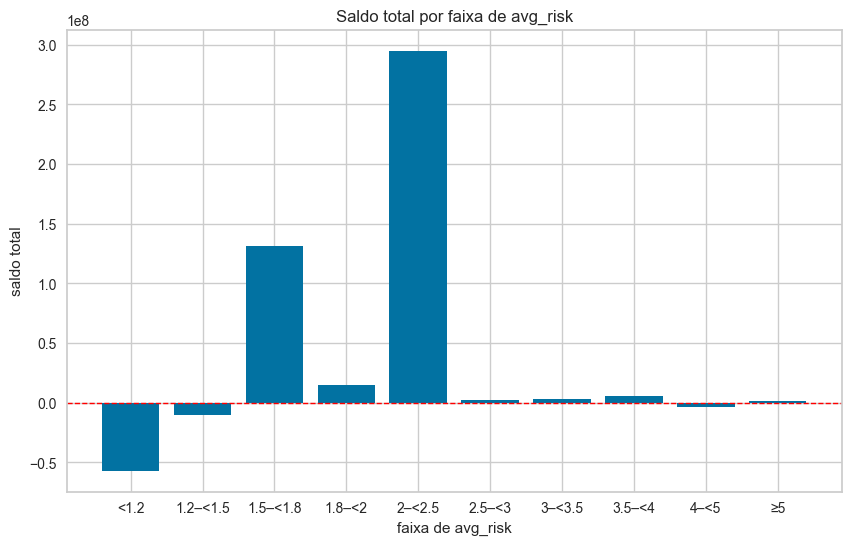

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.bar(saldo_por_bucket['avg_risk_bucket'], saldo_por_bucket['total_saldo'])
plt.title('Saldo total por faixa de avg_risk')
plt.xlabel('faixa de avg_risk')
plt.ylabel('saldo total')
plt.axhline(y=0, color='red', linewidth=1,linestyle='--')
plt.show()


In [ ]:
games_df = games.copy()


In [ ]:
games_df['avg_bet_amount'] = games_df['total_bet_amount'] / games_df['player_count']


In [ ]:
games_df.describe()


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,avg_bet_amount
count,7.162500e+04,71625.000000,71625.000000,71625.000000,71625.000000,71625.000000,71625.000000,7.162500e+04,71505.000000
mean,2.864187e+06,11.340412,157.038384,154.688104,-2.350280,337.916342,358.816265,1.600499e+09,0.451505
std,2.067650e+04,246.945456,330.138567,489.732506,384.203693,40.665719,43.372689,5.325096e+05,0.906561
min,2.828375e+06,1.000000,0.000000,0.000000,-14957.508233,0.000000,0.000000,1.599622e+09,0.000000
25%,2.846281e+06,1.310000,48.396370,14.209756,-55.719407,315.000000,334.000000,1.600056e+09,0.147511
50%,2.864187e+06,1.990000,83.022545,50.352123,-8.755664,340.000000,361.000000,1.600488e+09,0.245792
75%,2.882093e+06,3.980000,151.108175,143.516115,47.262142,363.000000,386.000000,1.600920e+09,0.439648
max,2.899999e+06,33617.440000,14971.851192,29881.809556,24308.751294,463.000000,502.000000,1.601438e+09,42.174229


In [ ]:
med_per_game = (
    df.groupby('game_id', sort=False)['fiat_bet_amount']
      .median()
      .rename('median_bet_amount')
)
med_per_game


game_id
2828375    0.000151
2828376    0.000090
2828377    0.000088
2828378    0.000085
2828379    0.000085
             ...   
2899995    0.000305
2899996    0.000200
2899997    0.000400
2899999    0.000445
2899998    0.000200
Name: median_bet_amount, Length: 71499, dtype: float64

In [ ]:
df[df['game_id']==2828375].describe()


,game_id,user_id,bet_id,odds,fiat_bet_amount,fiat_profit_amount,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,odds_adjusted,bet_mean,bet_proportion,risk,risk_log
count,196.0,1.960000e+02,1.960000e+02,196.000000,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,196.000000,196.000000,196.0,196.0,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,2828375.0,1.089927e+06,1.794264e+08,1.724439,8.008353e-02,5.449624e-02,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,5.557488e-02,1.051020,2.666224,1.532886e-01,4.932898e-01,1.058759e+00,4.936096e-01
std,0.0,4.029342e+05,7.269224e+07,1.155678,6.142424e-01,6.171074e-01,8.904529e-16,3.561812e-15,0.000000,0.000000,0.0,0.0,0.000000e+00,6.171607e-01,0.220603,1.785957,4.995650e-01,8.677429e-01,1.841400e+00,6.020894e-01
min,2828375.0,5.554100e+04,1.214853e+07,0.000000,1.568393e-12,-2.000556e+00,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,-2.000556e+00,1.000000,1.010000,4.947098e-08,1.454284e-09,9.351049e-09,9.351049e-09
25%,2828375.0,1.015448e+06,2.108543e+08,1.195000,8.475740e-06,5.458748e-08,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,5.392520e-07,1.000000,1.960000,2.708280e-04,8.037874e-03,2.255680e-02,2.230574e-02
50%,2828375.0,1.264181e+06,2.108543e+08,2.000000,1.511135e-04,2.831453e-05,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,4.107785e-05,1.000000,2.000000,5.417314e-03,1.114618e-01,2.239843e-01,2.020944e-01
75%,2828375.0,1.370827e+06,2.108544e+08,2.000000,6.169093e-03,2.261179e-03,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,2.281004e-03,1.000000,2.375000,5.258035e-02,6.117234e-01,1.384196e+00,8.688481e-01
max,2828375.0,1.431714e+06,2.108545e+08,6.000000,8.287556e+00,8.287556e+00,6.430000e+00,1.569637e+01,26.377635,10.681263,206.0,217.0,1.599622e+09,8.287556e+00,2.000000,10.000000,4.609434e+00,5.566048e+00,1.113210e+01,2.495855e+00


In [ ]:
games_df = games_df.join(med_per_game, on='game_id')


In [ ]:
games_df


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,avg_bet_amount,median_bet_amount
0,2828375,6.43,15.696372,26.377635,10.681263,206,217,1599622213,0.076196,0.000151
1,2828376,2.10,69.101741,71.544642,2.442901,294,314,1599622213,0.235040,0.000090
2,2828377,3.11,41.762966,32.070902,-9.692064,289,306,1599622213,0.144509,0.000088
3,2828378,24.97,73.392453,110.032057,36.639604,281,299,1599622213,0.261183,0.000085
4,2828379,1.04,58.377711,71.760673,13.382962,281,297,1599622213,0.207750,0.000085
...,...,...,...,...,...,...,...,...,...,...
71620,2899995,2.04,150.967822,108.736242,-42.231580,381,400,1601438402,0.396241,0.000305
71621,2899996,1.27,80.657169,9.038559,-71.618610,371,386,1601438402,0.217405,0.000200
71622,2899997,2.51,212.218466,341.837748,129.619282,381,400,1601438402,0.557004,0.000400
71623,2899998,1.07,82.275220,16.021457,-66.253763,364,381,1601438402,0.226031,0.000200


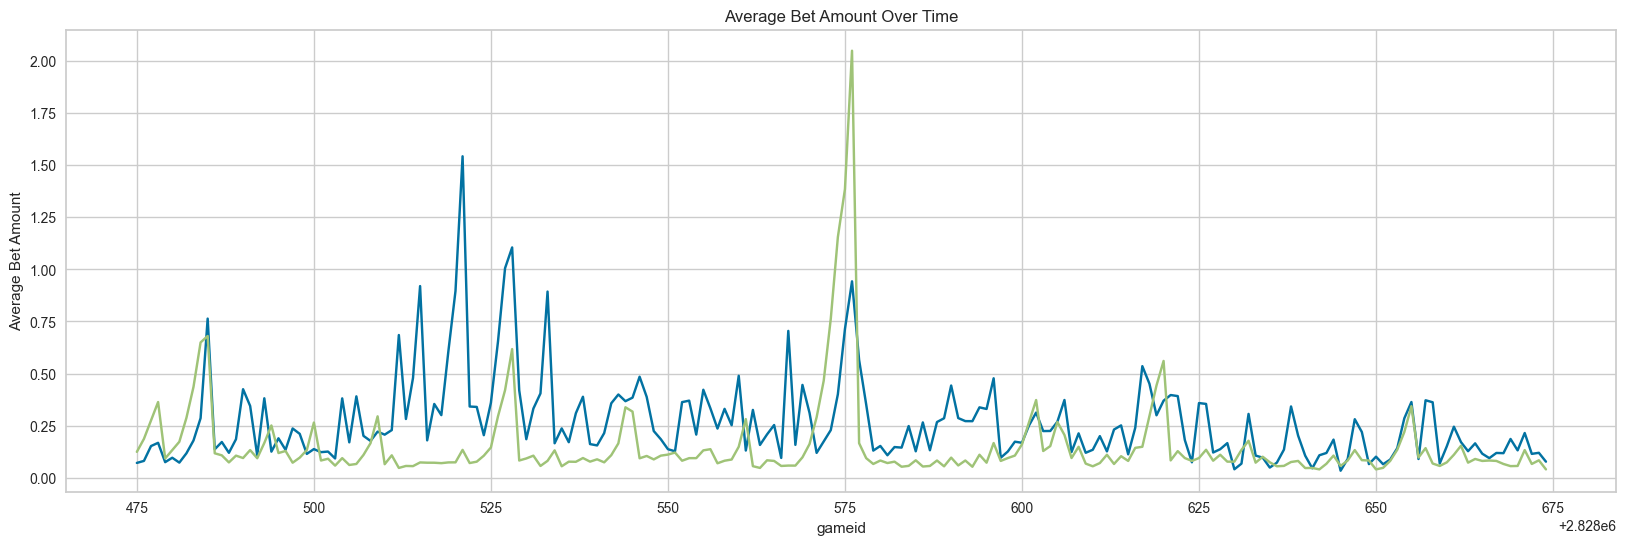

In [ ]:
fig = plt.figure(figsize=(20, 6))
amostra = games_df[100:300]
plt.plot(amostra['game_id'], amostra['avg_bet_amount'])
plt.plot(amostra['game_id'], amostra['median_bet_amount']*1000)
plt.title('Average Bet Amount Over Time')
plt.xlabel('gameid')
plt.ylabel('Average Bet Amount')
plt.show()


In [ ]:
games[193:205]


,game_id,max_rate,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp
193,2828568,1.63,48.731939,21.926169,-26.805770,308,325,1599624003
194,2828569,1.56,134.157989,11.295483,-122.862506,301,317,1599624003
195,2828570,1.15,93.737964,76.954077,-16.783886,301,319,1599624003
196,2828571,1.25,36.630092,4.610529,-32.019564,306,325,1599624003
197,2828572,1.29,53.940816,2.394448,-51.546368,309,330,1599624003
198,2828573,1.52,68.493685,3.999590,-64.494095,299,320,1599624003
199,2828574,1.93,121.459130,54.588586,-66.870544,303,325,1599624003
200,2828575,1.17,220.604762,7.394015,-213.210747,309,331,1599624003
201,2828576,2.01,289.370222,459.799789,170.429567,307,328,1599624003
202,2828577,84.58,170.282592,370.620139,200.337547,301,319,1599624003


In [43]:

def downcast_df(df: pd.DataFrame) -> pd.DataFrame:
    float_cols = df.select_dtypes(include=['float64','float32']).columns
    df[float_cols] = df[float_cols].astype('float32', copy=False)

    int_cols = df.select_dtypes(include=['int64','int32','int']).columns
    for c in int_cols:
        if df[c].min() >= 0 and df[c].max() <= np.iinfo(np.uint32).max:
            df[c] = df[c].astype('uint32', copy=False)
        else:
            df[c] = df[c].astype('int32', copy=False)


    if 'user_id' in df.columns:
        df['user_id'] = df['user_id'].astype('category')


    if 'game_id' in df.columns:
        df['game_id'] = df['game_id'].astype('category')

    gc.collect()
    return df


In [44]:
dc_df = downcast_df(df)



In [45]:
df = dc_df.copy()


In [46]:
df = df.drop(columns=['game_type','odds','max_rate','odds_adjusted','bet_mean','bet_proportion','risk'])
df.head()


,game_id,user_id,bet_id,fiat_bet_amount,fiat_profit_amount,total_bet_amount,total_win_amount,total_profit_amount,player_count,bet_count,timestamp,saldo,n_aposta,risk_log
0,2828375,173570,210854317,0.048738,-0.048738,15.696372,26.377634,10.681263,206,217,1599622213,-0.048738,1,1.925325
2,2828375,1139219,210854260,0.000088,0.000088,15.696372,26.377634,10.681263,206,217,1599622213,0.000088,1,0.798888
3,2828375,1329183,12148544,0.188109,-0.188109,15.696372,26.377634,10.681263,206,217,1599622213,-0.188109,1,1.613625
4,2828375,1378328,210854292,0.000005,-0.000005,15.696372,26.377634,10.681263,206,217,1599622213,-0.000005,1,0.032628
5,2828375,1420292,210854342,0.000107,0.000213,15.696372,26.377634,10.681263,206,217,1599622213,0.000213,1,0.741451


In [47]:
df['avg_game_bet_amount'] = df.groupby('game_id', sort=False)['fiat_bet_amount'].transform('mean')
df['median_game_bet_amount'] = df.groupby('game_id', sort=False)['fiat_bet_amount'].transform('median')
df['avg_game_win_amount'] = df.groupby('game_id', sort=False)['fiat_profit_amount'].transform('mean')
df['median_game_win_amount'] = df.groupby('game_id', sort=False)['fiat_profit_amount'].transform('median')


In [48]:
df = df.drop(columns=['total_bet_amount','total_win_amount','total_profit_amount','player_count','bet_count'])
df.head()


,game_id,user_id,bet_id,fiat_bet_amount,fiat_profit_amount,timestamp,saldo,n_aposta,risk_log,avg_game_bet_amount,median_game_bet_amount,avg_game_win_amount,median_game_win_amount
0,2828375,173570,210854317,0.048738,-0.048738,1599622213,-0.048738,1,1.925325,0.080084,0.000151,0.054496,0.000028
2,2828375,1139219,210854260,0.000088,0.000088,1599622213,0.000088,1,0.798888,0.080084,0.000151,0.054496,0.000028
3,2828375,1329183,12148544,0.188109,-0.188109,1599622213,-0.188109,1,1.613625,0.080084,0.000151,0.054496,0.000028
4,2828375,1378328,210854292,0.000005,-0.000005,1599622213,-0.000005,1,0.032628,0.080084,0.000151,0.054496,0.000028
5,2828375,1420292,210854342,0.000107,0.000213,1599622213,0.000213,1,0.741451,0.080084,0.000151,0.054496,0.000028


In [49]:
df.head()


,game_id,user_id,bet_id,fiat_bet_amount,fiat_profit_amount,timestamp,saldo,n_aposta,risk_log,avg_game_bet_amount,median_game_bet_amount,avg_game_win_amount,median_game_win_amount
0,2828375,173570,210854317,0.048738,-0.048738,1599622213,-0.048738,1,1.925325,0.080084,0.000151,0.054496,0.000028
2,2828375,1139219,210854260,0.000088,0.000088,1599622213,0.000088,1,0.798888,0.080084,0.000151,0.054496,0.000028
3,2828375,1329183,12148544,0.188109,-0.188109,1599622213,-0.188109,1,1.613625,0.080084,0.000151,0.054496,0.000028
4,2828375,1378328,210854292,0.000005,-0.000005,1599622213,-0.000005,1,0.032628,0.080084,0.000151,0.054496,0.000028
5,2828375,1420292,210854342,0.000107,0.000213,1599622213,0.000213,1,0.741451,0.080084,0.000151,0.054496,0.000028


In [50]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.sort_values(['user_id', 'datetime'])
df = df.set_index('datetime')


In [51]:
df.head()


,game_id,user_id,bet_id,fiat_bet_amount,fiat_profit_amount,timestamp,saldo,n_aposta,risk_log,avg_game_bet_amount,median_game_bet_amount,avg_game_win_amount,median_game_win_amount
datetime,,,,,,,,,,,,,
2020-09-09 04:00:03,2831698,44,212042687,0.000034,0.000001,1599624003,0.000001,1,0.000810,0.222572,0.000443,0.066997,9.498483e-06
2020-09-09 04:00:03,2831768,44,212067364,0.000034,0.000001,1599624003,0.000002,2,0.000810,0.770692,0.000152,0.214109,4.122475e-07
2020-09-09 04:00:03,2831820,44,212085405,0.000034,0.000003,1599624003,0.000005,3,0.000849,0.601125,0.000478,-0.524657,-1.838832e-04
2020-09-10 04:01:07,2832628,44,212376980,0.000035,0.000024,1599710467,0.000028,4,0.001365,0.974122,0.000277,0.700149,1.409974e-06
2020-09-10 04:01:07,2832686,44,212397916,0.000140,0.000140,1599710467,0.000169,5,0.006522,0.129546,0.000182,0.705016,9.065388e-05


In [52]:
cols = ['fiat_bet_amount', 'fiat_profit_amount','avg_game_bet_amount', 'avg_game_win_amount', 'median_game_bet_amount', 'median_game_win_amount', 'risk_log']
windows = {'2d':'2D', '7d':'7D', '14d':'14D', '21d':'21D'}

for col in cols:
    g = df.groupby('user_id')[col]
    for suf, w in windows.items():
        df[f'{col}_mean_{suf}'] = (
            g.rolling(w, min_periods=1)
             .mean()
             .reset_index(level=0, drop=True)
        )


: 

: 

In [ ]:
df.head()


,game_id,user_id,bet_id,fiat_bet_amount,fiat_profit_amount,timestamp,saldo,n_aposta,risk_log,avg_game_bet_amount,...,median_game_bet_amount_mean_14d,median_game_bet_amount_mean_21d,median_game_win_amount_mean_2d,median_game_win_amount_mean_7d,median_game_win_amount_mean_14d,median_game_win_amount_mean_21d,risk_log_mean_2d,risk_log_mean_7d,risk_log_mean_14d,risk_log_mean_21d
datetime,,,,,,,,,,,,,,,,,,,,,
2020-09-09 04:00:03,2831698,44,212042687,0.000034,0.000001,1599624003,0.000001,1,0.000810,0.222572,...,0.000443,0.000443,0.000009,0.000009,0.000009,0.000009,0.000810,0.000810,0.000810,0.000810
2020-09-09 04:00:03,2831768,44,212067364,0.000034,0.000001,1599624003,0.000002,2,0.000810,0.770692,...,0.000298,0.000298,0.000005,0.000005,0.000005,0.000005,0.000810,0.000810,0.000810,0.000810
2020-09-09 04:00:03,2831820,44,212085405,0.000034,0.000003,1599624003,0.000005,3,0.000849,0.601125,...,0.000358,0.000358,-0.000058,-0.000058,-0.000058,-0.000058,0.000823,0.000823,0.000823,0.000823
2020-09-10 04:01:07,2832628,44,212376980,0.000035,0.000024,1599710467,0.000028,4,0.001365,0.974122,...,0.000338,0.000338,-0.000043,-0.000043,-0.000043,-0.000043,0.000959,0.000959,0.000959,0.000959
2020-09-10 04:01:07,2832686,44,212397916,0.000140,0.000140,1599710467,0.000169,5,0.006522,0.129546,...,0.000306,0.000306,-0.000016,-0.000016,-0.000016,-0.000016,0.002071,0.002071,0.002071,0.002071


In [ ]:
df.sort_values(['user_id','game_id'], kind='stable', inplace=True, ignore_index=True)
df = df.set_index('game_id')


MemoryError: Unable to allocate 178. MiB for an array with shape (23335924, 1) and data type float64

In [ ]:
df.columns


Index(['game_id', 'user_id', 'bet_id', 'fiat_bet_amount', 'fiat_profit_amount',
       'saldo', 'n_aposta', 'risk_log', 'avg_game_bet_amount',
       'median_game_bet_amount', 'avg_game_win_amount',
       'median_game_win_amount', 'fiat_bet_amount_mean_2d',
       'fiat_bet_amount_mean_7d', 'fiat_bet_amount_mean_14d',
       'fiat_bet_amount_mean_21d', 'fiat_profit_amount_mean_2d',
       'fiat_profit_amount_mean_7d', 'fiat_profit_amount_mean_14d',
       'fiat_profit_amount_mean_21d', 'avg_game_bet_amount_mean_2d',
       'avg_game_bet_amount_mean_7d', 'avg_game_bet_amount_mean_14d',
       'avg_game_bet_amount_mean_21d', 'avg_game_win_amount_mean_2d',
       'avg_game_win_amount_mean_7d', 'avg_game_win_amount_mean_14d',
       'avg_game_win_amount_mean_21d', 'median_game_bet_amount_mean_2d',
       'median_game_bet_amount_mean_7d', 'median_game_bet_amount_mean_14d',
       'median_game_bet_amount_mean_21d', 'median_game_win_amount_mean_2d',
       'median_game_win_amount_mean_7d', '

In [ ]:
cols = ['fiat_bet_amount', 'fiat_profit_amount',
        'avg_game_bet_amount', 'avg_game_win_amount',
        'median_game_bet_amount', 'median_game_win_amount', 'risk_log']

windows_games = [10, 50, 100, 200]

for col in cols:
    g = df.groupby('user_id')[col]
    for w in windows_games:
        df[f'{col}_mean_{w}j'] = (
            g.rolling(window=w, min_periods=1)
             .mean()
             .reset_index(level=0, drop=True)
        )
